# Parte 2: Segmentación
Se realiza la segmentación de algunos de los elementos presentes en la imagen a analizar.

In [1]:
# Librerías principales
import numpy as np
import cv2 as cv
import matplotlib
from matplotlib import pyplot as plt

# Tipo de visualización
%matplotlib inline

# Versiones de librerías
print("".join(f"{x[0]}: {x[1]}\n" for x in [
    ("Numpy",np.__version__),
    ("openCV",cv.__version__),
    ("Matplotlib",matplotlib.__version__),
]))

Numpy: 1.22.3
openCV: 4.5.5
Matplotlib: 3.5.1



## Imágenes
Se levantan las imágenes que se emplearán como prueba del algoritmo. Se verifica el orden de los canales de color


In [2]:
# Definición de la ruta para levantar las imagenes
PATH = r'D:\Profesion\Disciplinas\vision_computadora_I\practicas\tp_1\data'

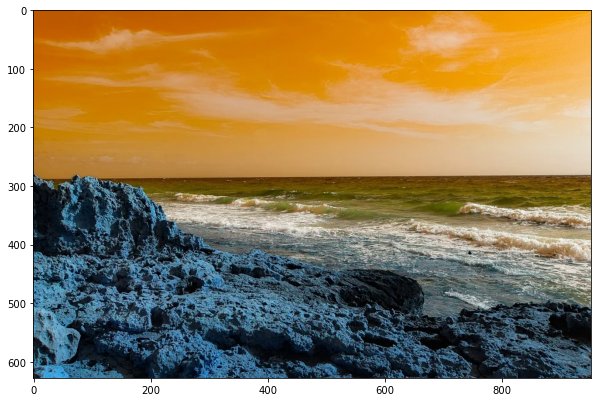

Dimensiones de la imagen: (628, 953, 3)


In [3]:

segmentacion = cv.imread(os.path.join(PATH, 'segmentacion.png'))

# Verificación si ha levantado las imágenes con los canales correctos y coincide con las originales
plt.figure(1,figsize=(10,8))

ax=plt.subplot()
ax.imshow(segmentacion)

plt.show()
# Verificación de dimensiones y canales
print(f'Dimensiones de la imagen: {segmentacion.shape}')


Hace falta transformar de BGR a RGB

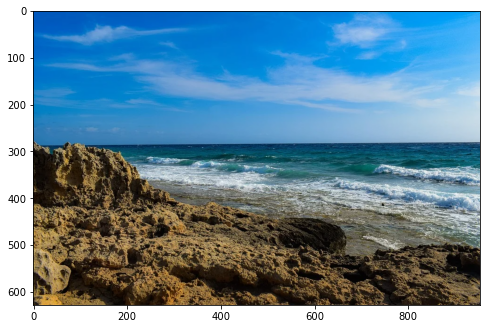

In [46]:
# Conversión BGR a RGB
segm_RGB = cv.cvtColor(segmentacion, cv.COLOR_BGR2RGB)

plt.figure(2,figsize=(8,6))
plt.imshow(segm_RGB)
plt.show()

## Histograma
De la información que muestra el histograma, se destacan tres picos:
- Color azul: representativo del cielo.
- Color verde: representativo del mar, pero sin la playa y la espuma de las olas.
- Un pico tricolor con preponderancia en rojo representativo de la tierra.

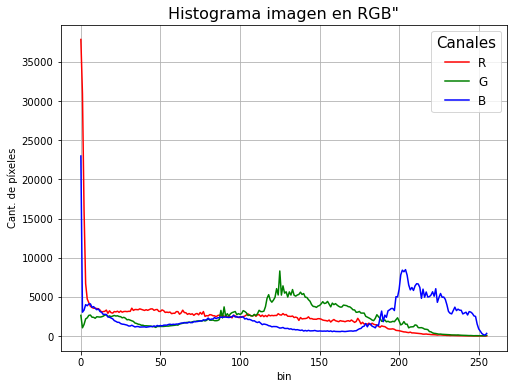

In [5]:
plt.figure(3,figsize=(8,6))
hist_r, bin_r = np.histogram(segm_RGB[...,0].ravel(),256,[0,256])
hist_g, bin_g = np.histogram(segm_RGB[...,1].ravel(),256,[0,256])
hist_b, bin_b = np.histogram(segm_RGB[...,2].ravel(),256,[0,256])

plt.plot(hist_r, color='r',label='R')
plt.plot(hist_g, color='g',label='G')
plt.plot(hist_b, color='b',label='B')

plt.grid()
plt.xlabel('bin')
plt.ylabel('Cant. de píxeles')
plt.legend(title='Canales', title_fontsize=15 ,fontsize=12)
plt.title('Histograma imagen en RGB"', fontsize=16)
plt.show()


### Segmentación
Se buscará segmentar el mar. No esta incluída la espuma generada por las olas, ya que está representada por otro color. La muestra como la estimación estadística de la misma se hace con los colores en HSV. A continuación se muestran los pasos. 

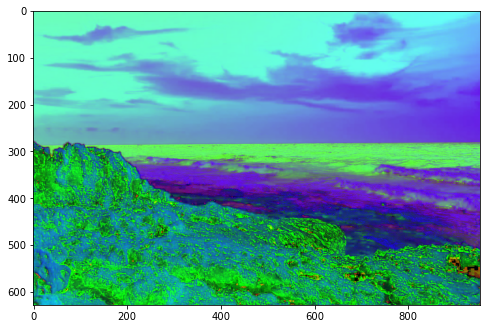

In [36]:
# Conversión de la imagen a HSV
segm_HSV = cv.cvtColor(segmentacion, cv.COLOR_BGR2HSV)
plt.figure(5, figsize=(8,6))
plt.imshow(segm_HSV)

In [27]:
# Muestra de mar en HSV
img_muestra_HSV = segm_HSV[300:350,600:680,:]

# Modelo estadístico sencillo para caracterizar el color del morrón rojo en el espacio RGB
color_mean, color_std = cv.meanStdDev(img_muestra_HSV)
    
# Valores de media y desvío estandar para cada canal
print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())

[95.39425, 201.864, 104.91525]
[1.6605170693193567, 44.000409134461485, 19.392165104430735]


Ahora se pintará las partes a excluir. Para ello se hace una máscara con puntos cercanos a la media en un radio menor a 3.4 $\sigma$. Se muestran los resultados comparativos

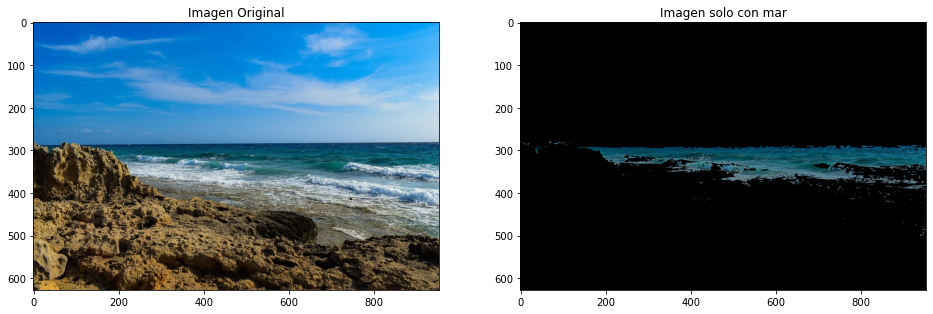

In [47]:
# cálculo de la máscara
mask = cv.inRange(segm_HSV, color_mean-color_std*3.4,  color_mean+color_std*3.4)
segm_RGB_mar = cv.bitwise_and(segm_RGB, segm_RGB, mask=mask)


# Muestra de resultados comparativos
fig = plt.figure(figsize=(16, 10))

ax1=plt.subplot(121)
ax1.imshow(segm_RGB)
ax1.set_title('Imagen Original')

ax2=plt.subplot(122)
ax2.imshow(segm_RGB_mar)
ax2.set_title('Imagen solo con mar')

plt.show()